In [8]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import yfinance as yf
yf.pdr_override()

In [9]:
dados_bancarios = pdr.get_data_yahoo(['ITUB4.SA', 'BBAS3.SA', 'SANB4.SA', 'BBDC4.SA', '^BVSP'], 
                                     start = "2010-01-01", end = '2022-04-30')['Adj Close']

dados_bancarios

[*********************100%***********************]  5 of 5 completed


,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,12.759068,7.674427,10.893428,5.563495,70045.0
2010-01-05,12.631047,7.636653,10.964025,5.563495,70240.0
2010-01-06,12.648117,7.575560,10.868999,5.563495,70729.0
2010-01-07,12.652383,7.555194,10.757673,5.563495,70451.0
2010-01-08,12.724936,7.547049,10.594766,5.563495,70263.0
...,...,...,...,...,...
2022-04-25,32.742828,17.946095,24.603920,16.824757,110685.0
2022-04-26,32.006821,17.175636,23.766794,16.059992,108213.0
2022-04-27,32.148365,17.278990,23.574350,16.069551,109349.0


In [12]:
#Puxar da fundamentus?

lucro_bancos = pd.read_excel('Minicurso_python_planilha_2022.xlsx', index_col = "data")

lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [16]:
itau = dados_bancarios['ITUB4.SA']
santander = dados_bancarios['SANB4.SA']
banco_do_brasil = dados_bancarios['BBAS3.SA']
bradesco = dados_bancarios['BBDC4.SA']
dados_mercado = dados_bancarios['^BVSP']

In [17]:
def retorno(lista):
    retorno = lista[-1]/lista[0] - 1
    
    return retorno 

In [18]:
retorno_itau = retorno(lista = itau)
retorno_banco_brasil = retorno(lista = banco_do_brasil)
retorno_bradesco = retorno(lista = bradesco)
retorno_santander = retorno(lista = santander)
retorno_mercado = retorno(lista = dados_mercado)

In [19]:
retorno_itau, retorno_banco_brasil, retorno_bradesco, retorno_santander, retorno_mercado

(1.1084407586477565,
 1.4567863926750673,
 1.2013060410924519,
 1.8574628915632703,
 0.5400956527946321)

In [20]:
df_retornos = pd.DataFrame(data = {'retornos': [retorno_itau, retorno_banco_brasil, 
                                   retorno_bradesco, retorno_santander, retorno_mercado]}, 
                           index = ["Itau", "Banco_do_Brasil", "Bradesco", "Santander", "Ibovespa"])

df_retornos

,retornos
Itau,1.108441
Banco_do_Brasil,1.456786
Bradesco,1.201306
Santander,1.857463
Ibovespa,0.540096


In [21]:
df_retornos['retornos'] = df_retornos['retornos'] * 100

In [22]:
df_retornos = df_retornos.sort_values(by = "retornos", ascending = False)

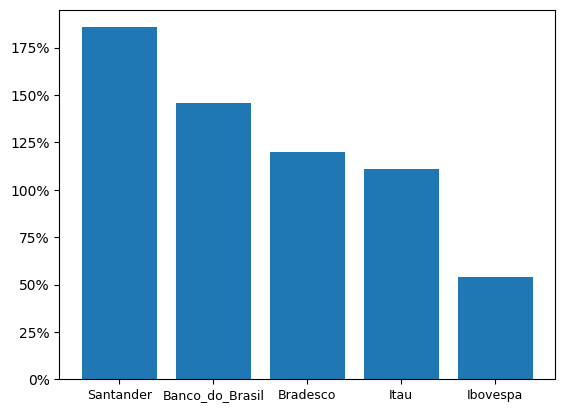

In [23]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index , df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

In [26]:
var_lucro_bancos = lucro_bancos.iloc[-1]/lucro_bancos.iloc[0] - 1

var_lucro_bancos = var_lucro_bancos  * 100

var_lucro_bancos = var_lucro_bancos.sort_values(ascending = False)

var_lucro_bancos

santander          729.931021
bradesco           173.900594
itau               148.226612
banco_do_brasil     94.238574
dtype: float64

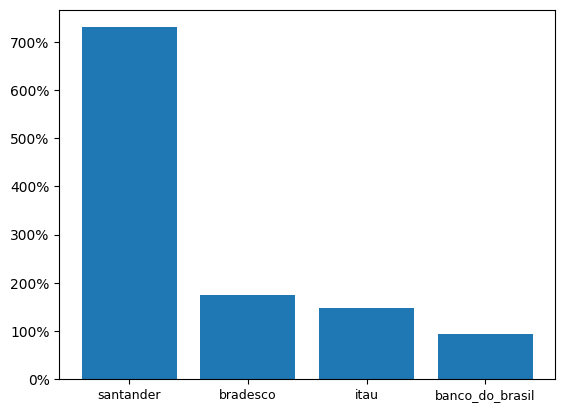

In [27]:
fig, ax = plt.subplots()

ax.bar(var_lucro_bancos.index , var_lucro_bancos)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

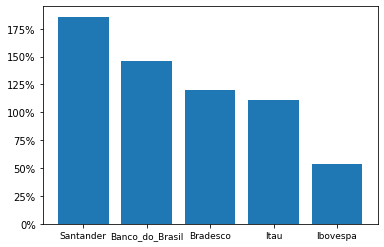

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index , df_retornos['retornos'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

In [28]:
def resample_periodo(dado, periodo):
    
    
    dado_periodo_novo = dado.resample(f"{periodo}").last()
    
    dado_periodo_novo = dado_periodo_novo.pct_change()
    
    dado_periodo_novo = dado_periodo_novo.dropna()
    
    return dado_periodo_novo
    

In [30]:
itau_ano_a_ano = resample_periodo(itau, "M")
ibov_ano_a_ano = resample_periodo(dados_mercado, "M")

ibov_ano_a_ano

Date
2010-02-28    0.016834
2010-03-31    0.058178
2010-04-30   -0.040385
2010-05-31   -0.066385
2010-06-30   -0.033483
                ...   
2021-12-31    0.028524
2022-01-31    0.072180
2022-02-28    0.006709
2022-03-31    0.060605
2022-04-30   -0.101026
Freq: M, Name: ^BVSP, Length: 147, dtype: float64

In [31]:
outperfom_itau = itau_ano_a_ano - ibov_ano_a_ano

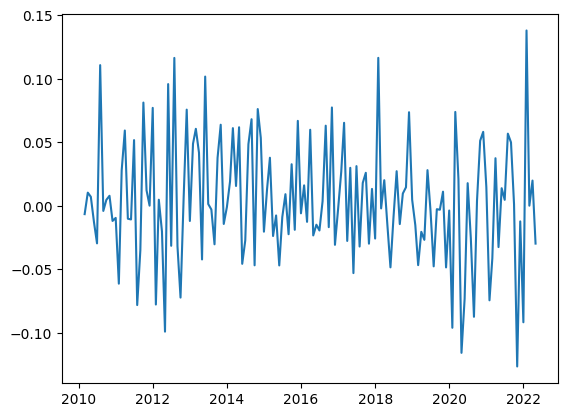

In [32]:
plt.plot(outperfom_itau)

In [33]:
meses_positivos = sum(outperfom_itau > 0)/len(outperfom_itau)

In [34]:
meses_positivos

0.5034013605442177

In [35]:
def long_short(long, short, periodo):
    
    var_long = resample_periodo(long, periodo)
    var_short = resample_periodo(short, periodo)
    
    outperfom = var_long - var_short
    
    print(outperfom)
    plt.plot(outperfom)  

Date
2011-12-31   -0.126649
2012-12-31   -0.059423
2013-12-31   -0.063501
2014-12-31   -0.317061
2015-12-31    0.428510
2016-12-31   -0.011193
2017-12-31    0.110263
2018-12-31    0.322074
2019-12-31    0.104349
2020-12-31    0.195711
2021-12-31    0.045116
2022-12-31   -0.058922
Freq: A-DEC, dtype: float64


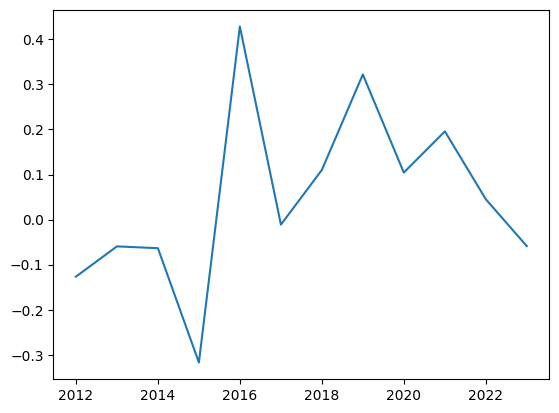

In [37]:
long_short(santander, itau, "Y")